# <center> Analysis of Cardiotocography Features and Their Impact on Foetal Health</center>
<center>Mark Kasavuli</center>


---

## Problem Statement:
<div style="text-align: justify;">
Eradicating preventable child and maternal deaths by 2030 is a crucial target of the UN Sustainable Development Goals. In low-income settings, accessible and effective prenatal care remains a challenge. This project aims to leverage the potential of cardiotocograms (CTGs), an inexpensive and widely available tool, to analyze foetal health data and predict potential complications. By unraveling the interconnected relationships between various CTG features, we hope to develop a classification system that empowers early intervention and ultimately saves lives. This data-driven approach holds immense promise for improving maternal and child health outcomes, particularly in resource-constrained environments.
</div>

<a id="cont"></a>
<a id="table-of-contents"></a>
## Table of Contents

<a href=#one>1. Importing Data Dependencies</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Preprocessing</a>

<a href=#five>5. Model and Model Evaluation</a>

<a href=#six>6. Conclusion and Recommendations</a>

<a id="one"></a>

# Importing Data Dependences

[Table of Contents](#table-of-contents)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy.stats import kruskal
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

<a id="two"></a>

# Loading the Data

[Back to Table of Contents](#table-of-contents)

In [3]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Genesis\foetal_health.csv")
pd.set_option('display.max_columns', None)
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<a id="three"></a>

# Exploratory Data Analysis

[Back to Table of Contents](#table-of-contents)

In [4]:
#check for the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [5]:
#check for the data types in the data
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [6]:
#change the fetal_health feature data type to object
df['fetal_health'] = df['fetal_health'].astype('object')
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Since this is a classification task, converting the target variable from numerical to object (categorical) data type serves several key purposes:

1. **Interpretability:**
   - Representing the target variable as an object (categorical) data type enhances interpretability by clearly indicating that the variable signifies distinct categories or classes. This is particularly valuable in the context of classification analysis.

2. **Avoiding Misinterpretation:**
   - Conversion to object data type is crucial when the target variable represents categorical labels, such as 'Yes' and 'No' or 'Type 1', 'Type 2', etc. This transformation helps prevent potential misinterpretation of the variable as numerical when it should be treated categorically.

3. **Preventing Unintended Mathematical Operations:**
   - Treating a categorical variable as numerical could result in unintended mathematical operations (e.g., averaging or adding class labels), introducing errors or misinterpretations in the analysis. Converting to object data type mitigates this risk and ensures proper handling of categorical information.

In [7]:
#check for any missing values
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mod

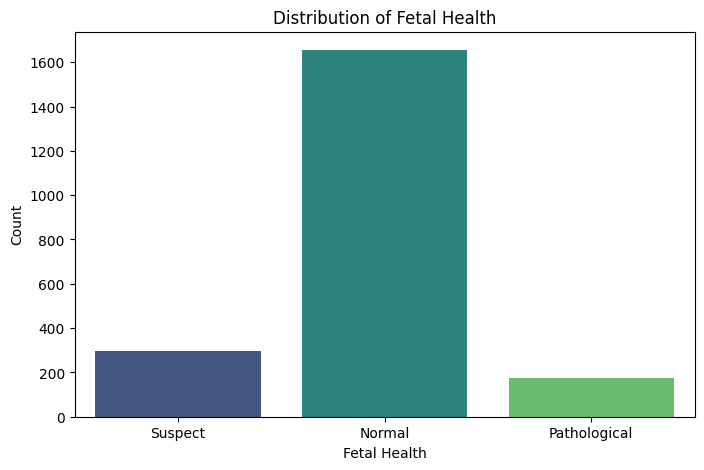

In [8]:
# Replace numerical values with labels for interpretability
df['fetal_health'] = df['fetal_health'].map({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='fetal_health', data=df, palette='viridis')
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

In [9]:
df['fetal_health'].value_counts()


fetal_health
Normal          1655
Suspect          295
Pathological     176
Name: count, dtype: int64

### Insights

The class distribution for the target variable "fetal_health" exhibits a noticeable imbalance, with a higher number of instances in the "Normal" class compared to the "Suspect" and "Pathological" classes.
Use of algorithms that inherently handle imbalanced datasets will be employed to mitigate this issue.

In [10]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,Suspect
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,Suspect
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,Suspect
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,Suspect


## Scatter Plots of fetal_health Vs All other features

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


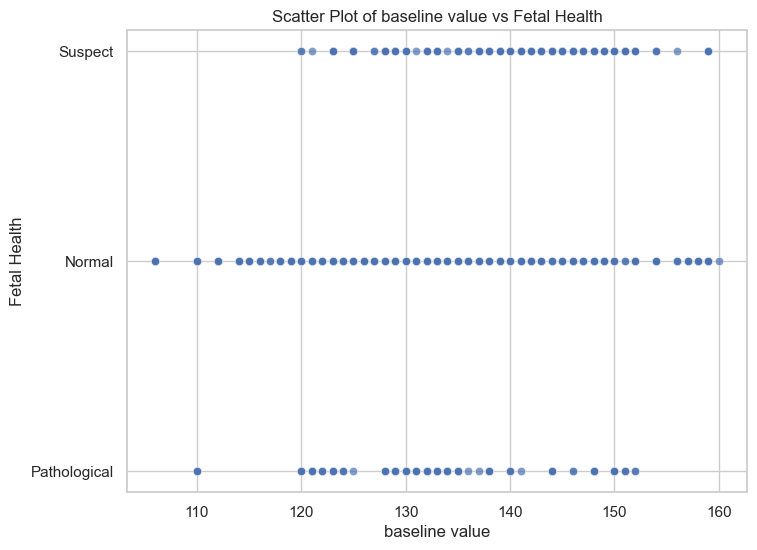

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


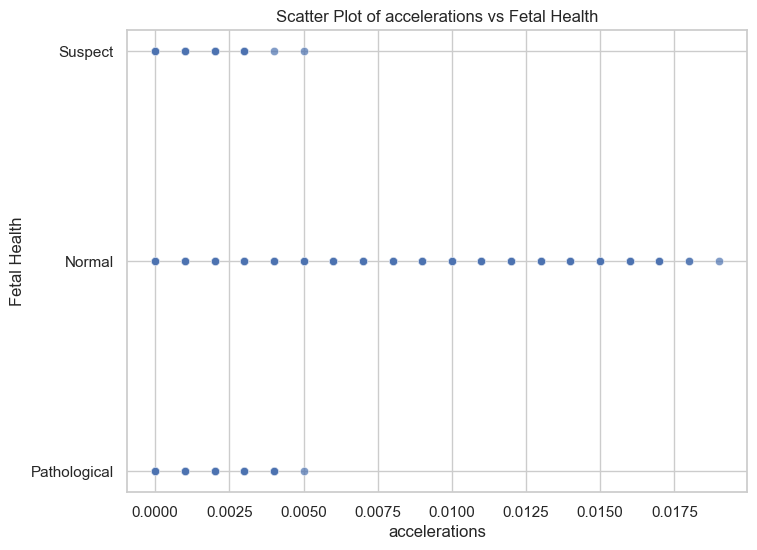

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


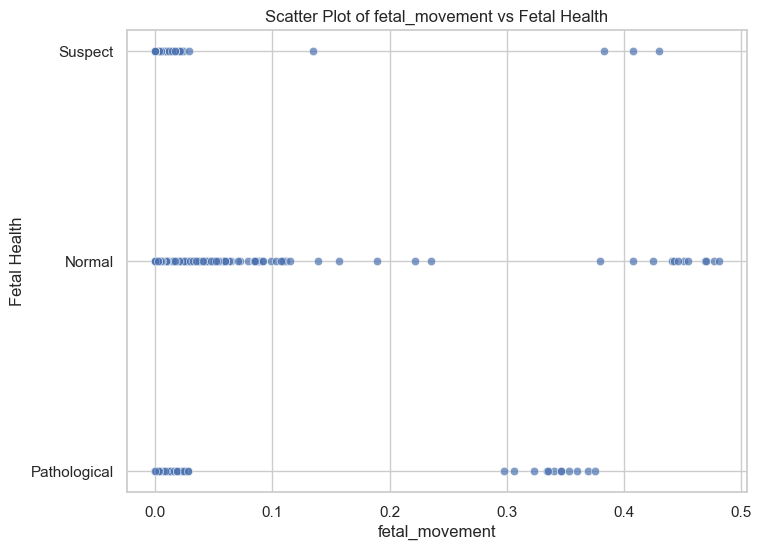

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


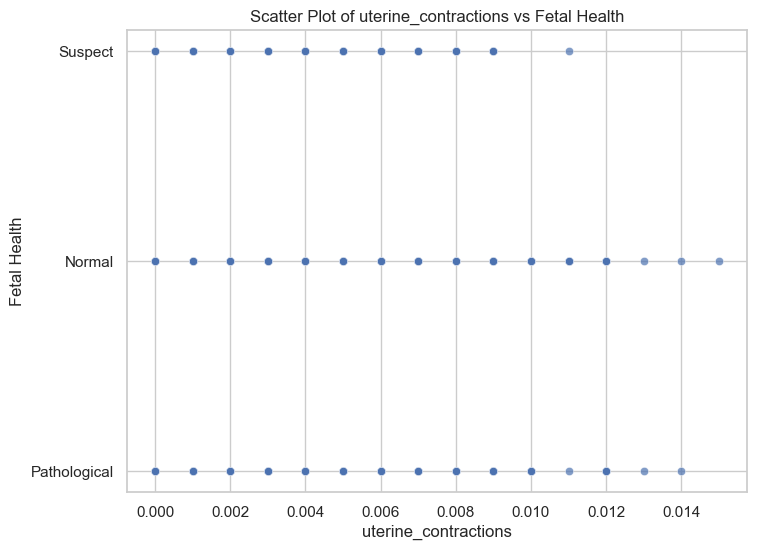

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


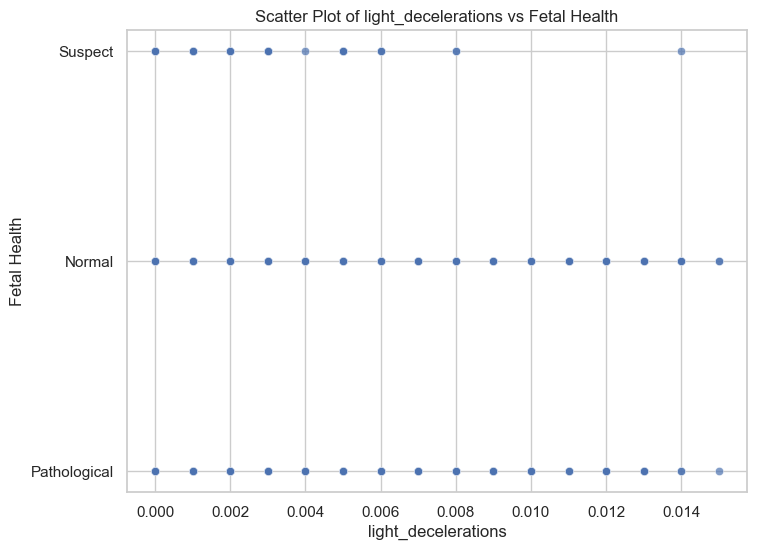

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


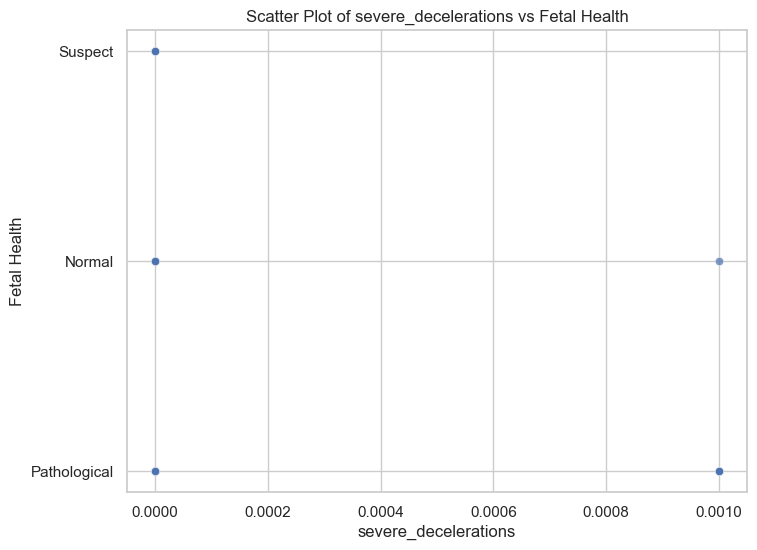

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


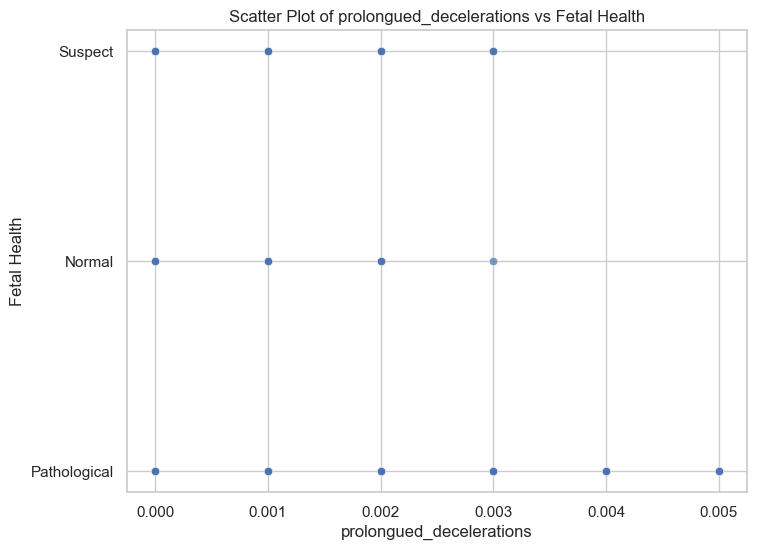

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


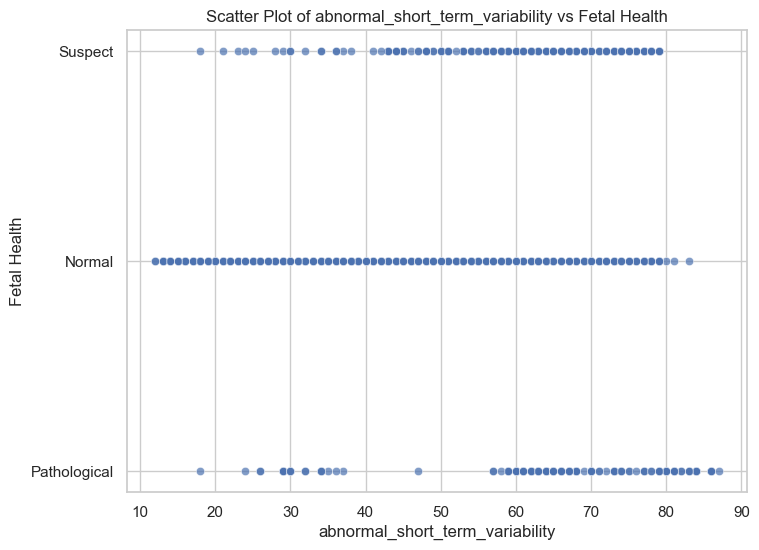

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


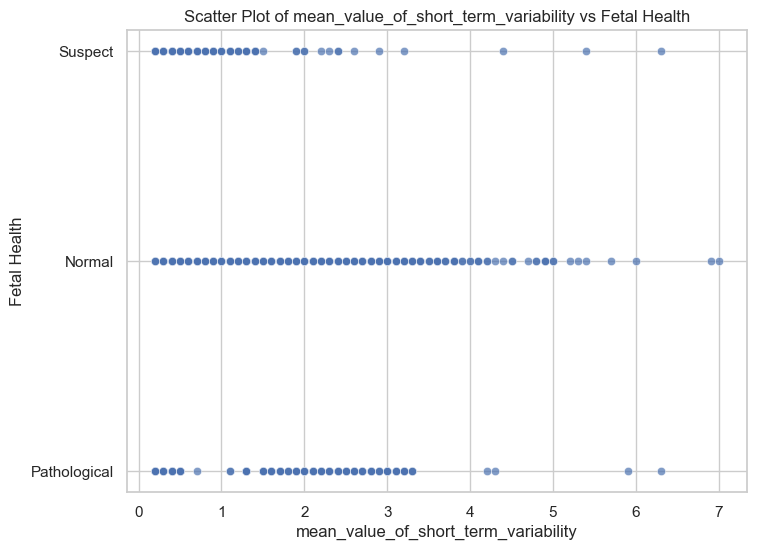

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


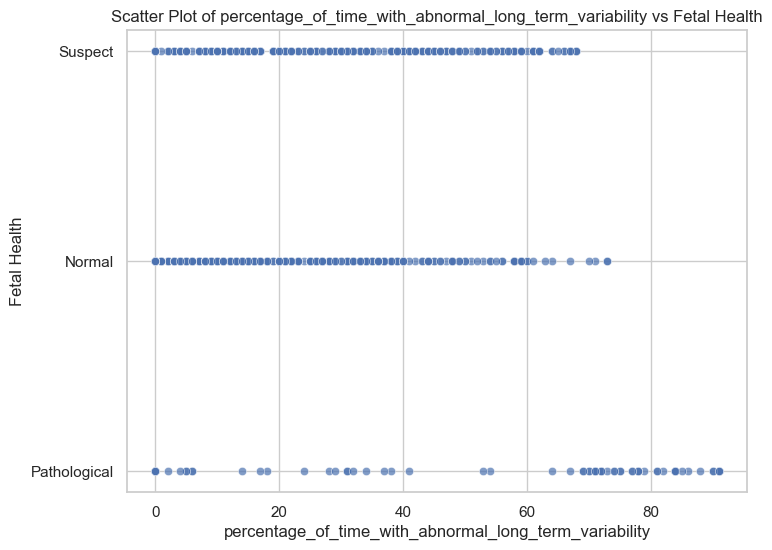

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


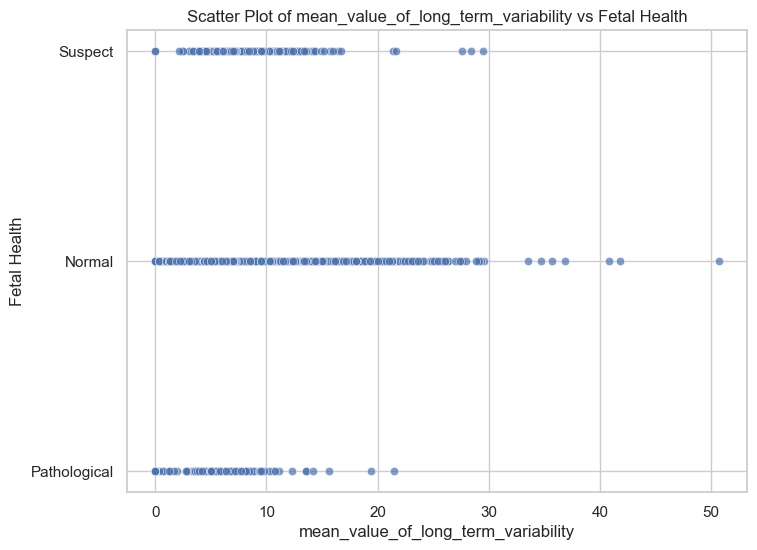

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


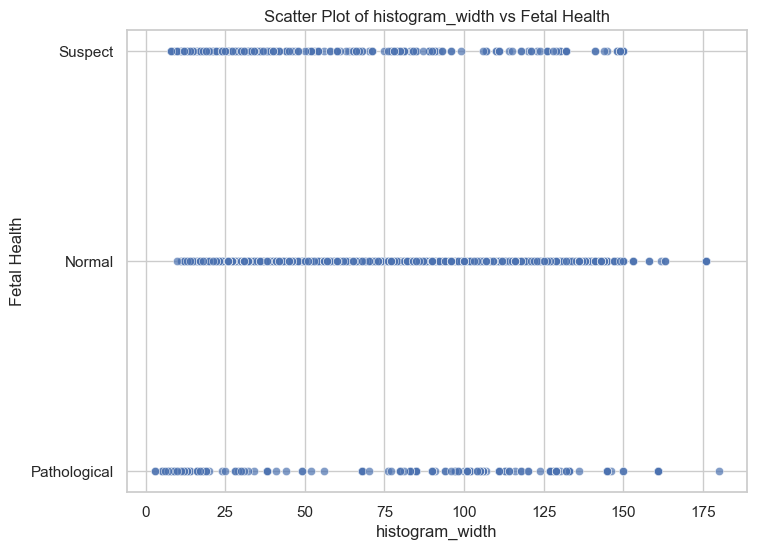

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


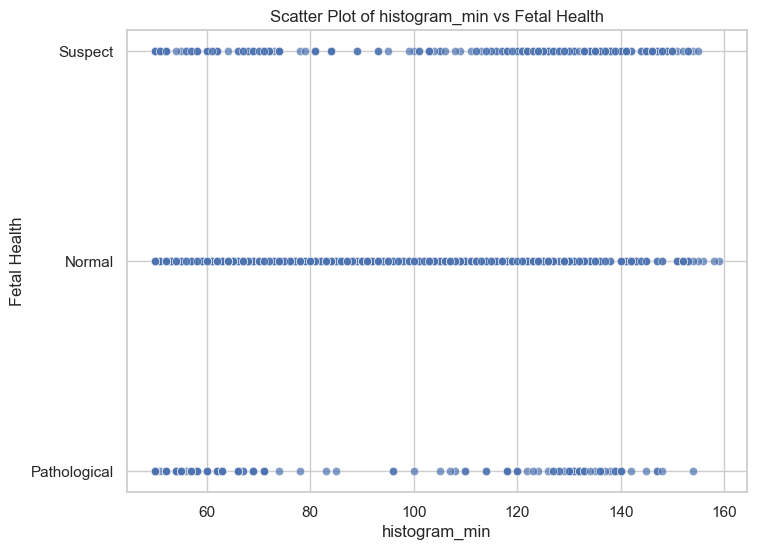

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


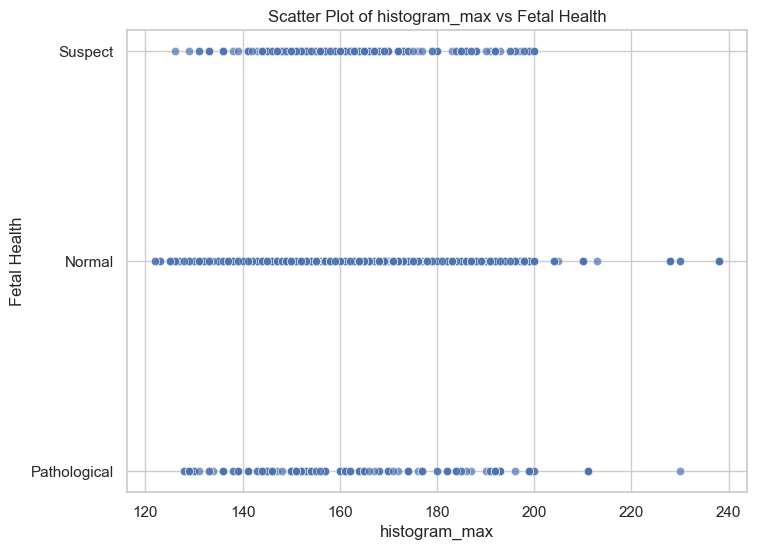

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


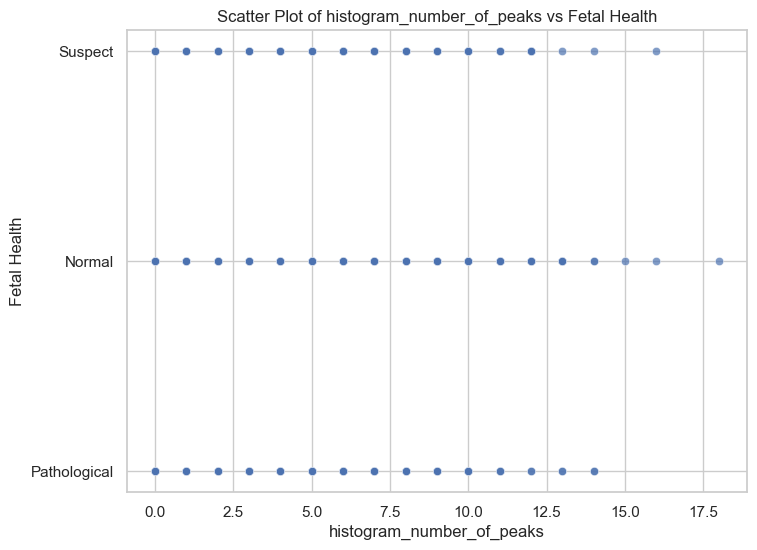

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


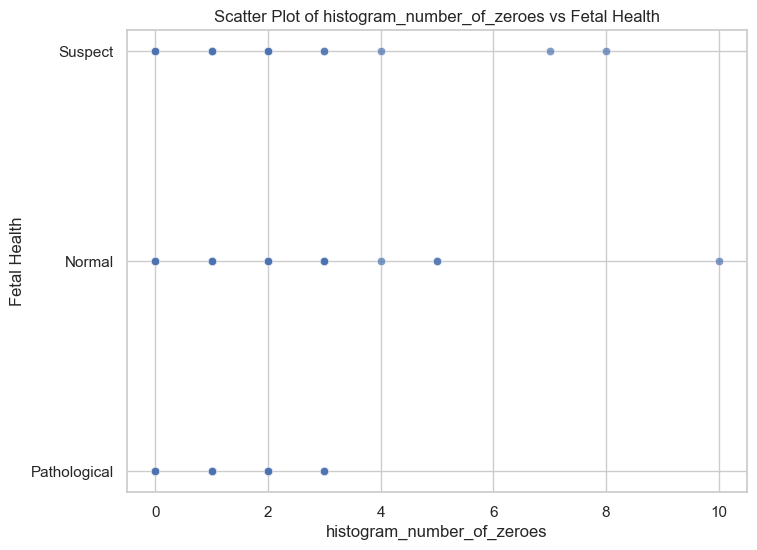

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


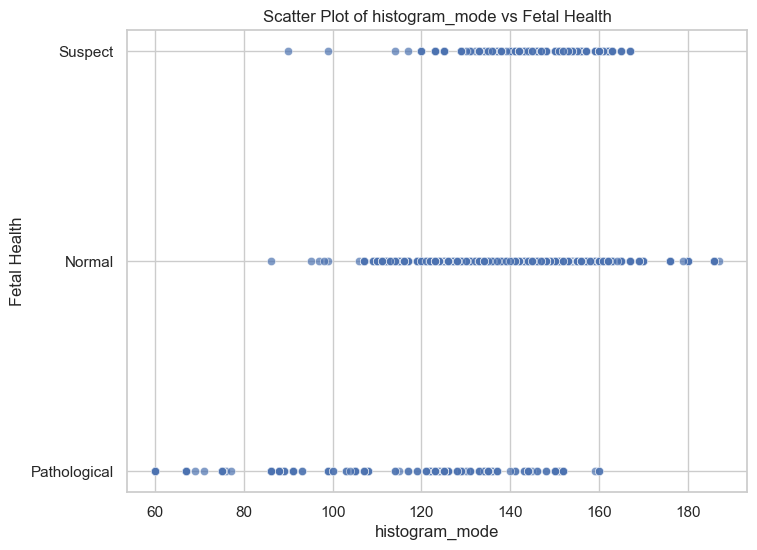

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


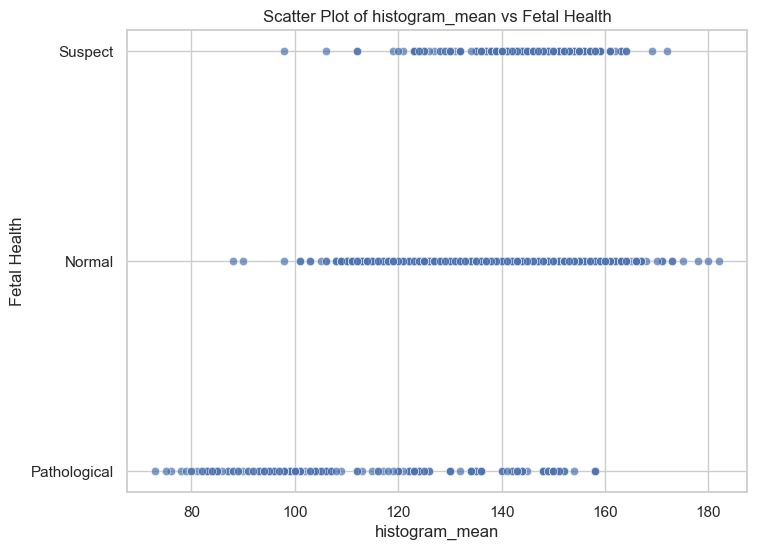

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


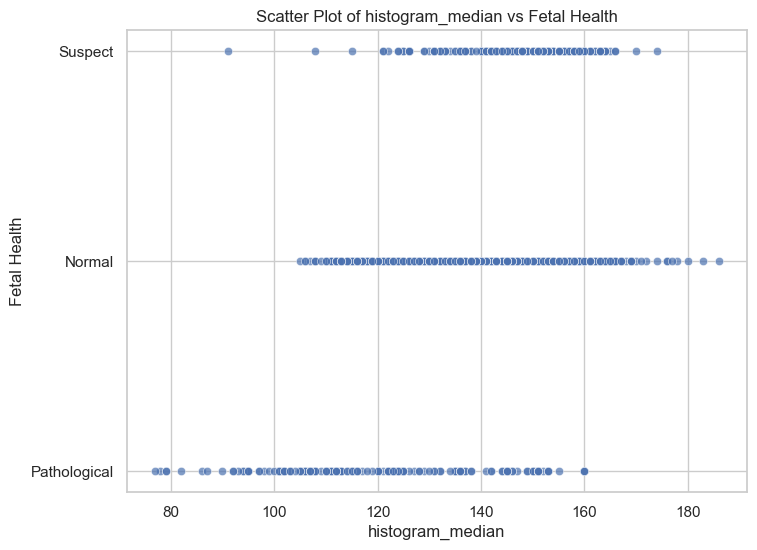

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


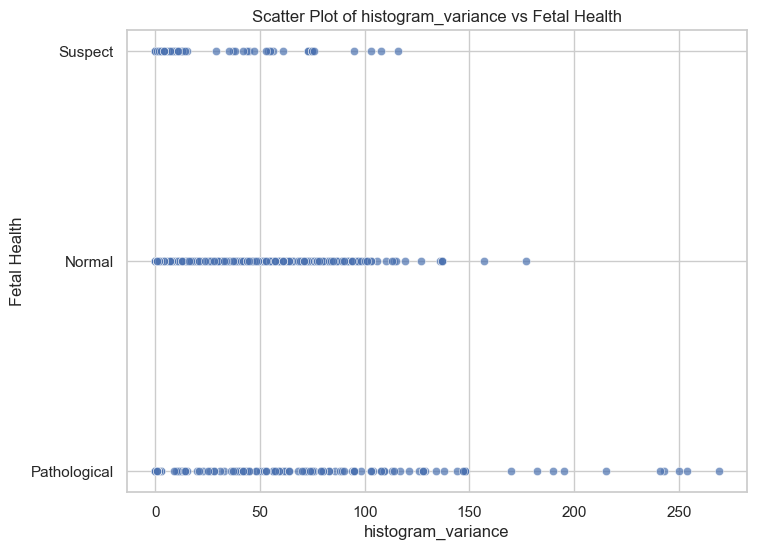

C:\Users\user\AppData\Local\Temp\ipykernel_16124\1723845202.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)


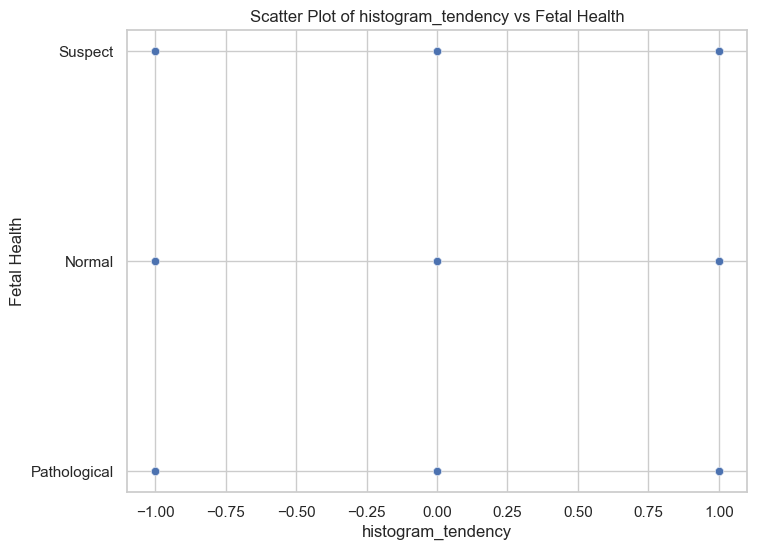

In [11]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot scatter plots for each feature against fetal_health
features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
            'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
            'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
            'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability',
            'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
            'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median',
            'histogram_variance', 'histogram_tendency']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='fetal_health', data=df, palette='husl', alpha=0.7)
    plt.title(f'Scatter Plot of {feature} vs Fetal Health')
    plt.xlabel(feature)
    plt.ylabel('Fetal Health')
    plt.show()

## Insights

### 1. Accelerations

- Normal Fetal Health:

High accelerations in the fetal heart rate (FHR) are generally considered indicative of normal fetal health. Accelerations signify an increase in the heart rate, often in response to fetal movement or other stimuli. In a healthy fetus, frequent and robust accelerations are a positive sign, suggesting that the cardiovascular system is responsive and adaptable.

- Fetal Responsiveness and Vigilance:

Normal fetal health is characterized by an active and responsive cardiovascular system. When the fetus moves or experiences stimuli, such as sound or touch, the heart rate typically accelerates. This responsiveness is a reassuring sign and suggests that the fetus is vigilant and capable of adapting to changes in its environment.

- Suspect or Pathological Fetal Health:

On the other hand, lower accelerations may be associated with suspect or pathological fetal health. Reduced accelerations might indicate decreased fetal responsiveness, which could be concerning. It may suggest that the fetus is not responding appropriately to stimuli, and this lack of adaptability could be a sign of distress or compromise.

- Clinical Monitoring and Intervention:

Medical professionals use accelerations in FHR as an essential parameter during antenatal monitoring. Patterns of reduced accelerations may prompt closer observation, additional testing, or intervention, depending on the clinical context. Early detection of abnormal patterns allows healthcare providers to take proactive measures to address potential issues and ensure the well-being of the fetus.

- Maternal-Fetal Interaction:

The observed correlation underscores the dynamic interaction between the maternal and fetal environments. Maternal conditions, such as adequate oxygenation and nutrient supply, play a role in supporting fetal well-being and, consequently, the presence of healthy accelerations in the FHR.


### 2. Prolonged Decelerations

- Reduced Oxygen Supply to the Fetus:

Prolonged decelerations, especially if recurrent or severe, may indicate a reduced oxygen supply to the fetus. This could result from factors such as compression of the umbilical cord, placental insufficiency, or other conditions compromising blood flow.


### 3. Percentage of time with long term variability

- Pathological Conditions and Reduced Variability:

Pathological fetal health conditions may compromise the autonomic nervous system's ability to regulate the fetal heart rate over time. In such cases, there may be a reduction in long-term variability, leading to a more monotonous or flat FHR pattern.

- Potential Causes of Reduced Variability:

Various factors can contribute to reduced long-term variability, including fetal distress, hypoxia (lack of oxygen), placental insufficiency, or other conditions affecting the central nervous system. These factors may disrupt the normal balance between sympathetic and parasympathetic influences on the fetal heart.

- Clinical Significance in Fetal Monitoring:

Continuous monitoring of long-term variability is a crucial aspect of cardiotocography (CTG) during pregnancy. A high percentage of time with abnormal long-term variability alerts healthcare providers to potential issues that require closer attention.

- Timely Intervention and Decision-Making:

The presence of abnormal long-term variability may prompt healthcare providers to take timely interventions. This could involve additional assessments, changes in maternal positioning, oxygen administration, or, in severe cases, consideration of delivery options to optimize fetal well-being.

- Risk Assessment and Management:

High percentages of time with abnormal long-term variability may contribute to an overall risk assessment for the fetus. Healthcare professionals may use this information, along with other CTG parameters and clinical factors, to make informed decisions about the best course of action for the mother and the baby.

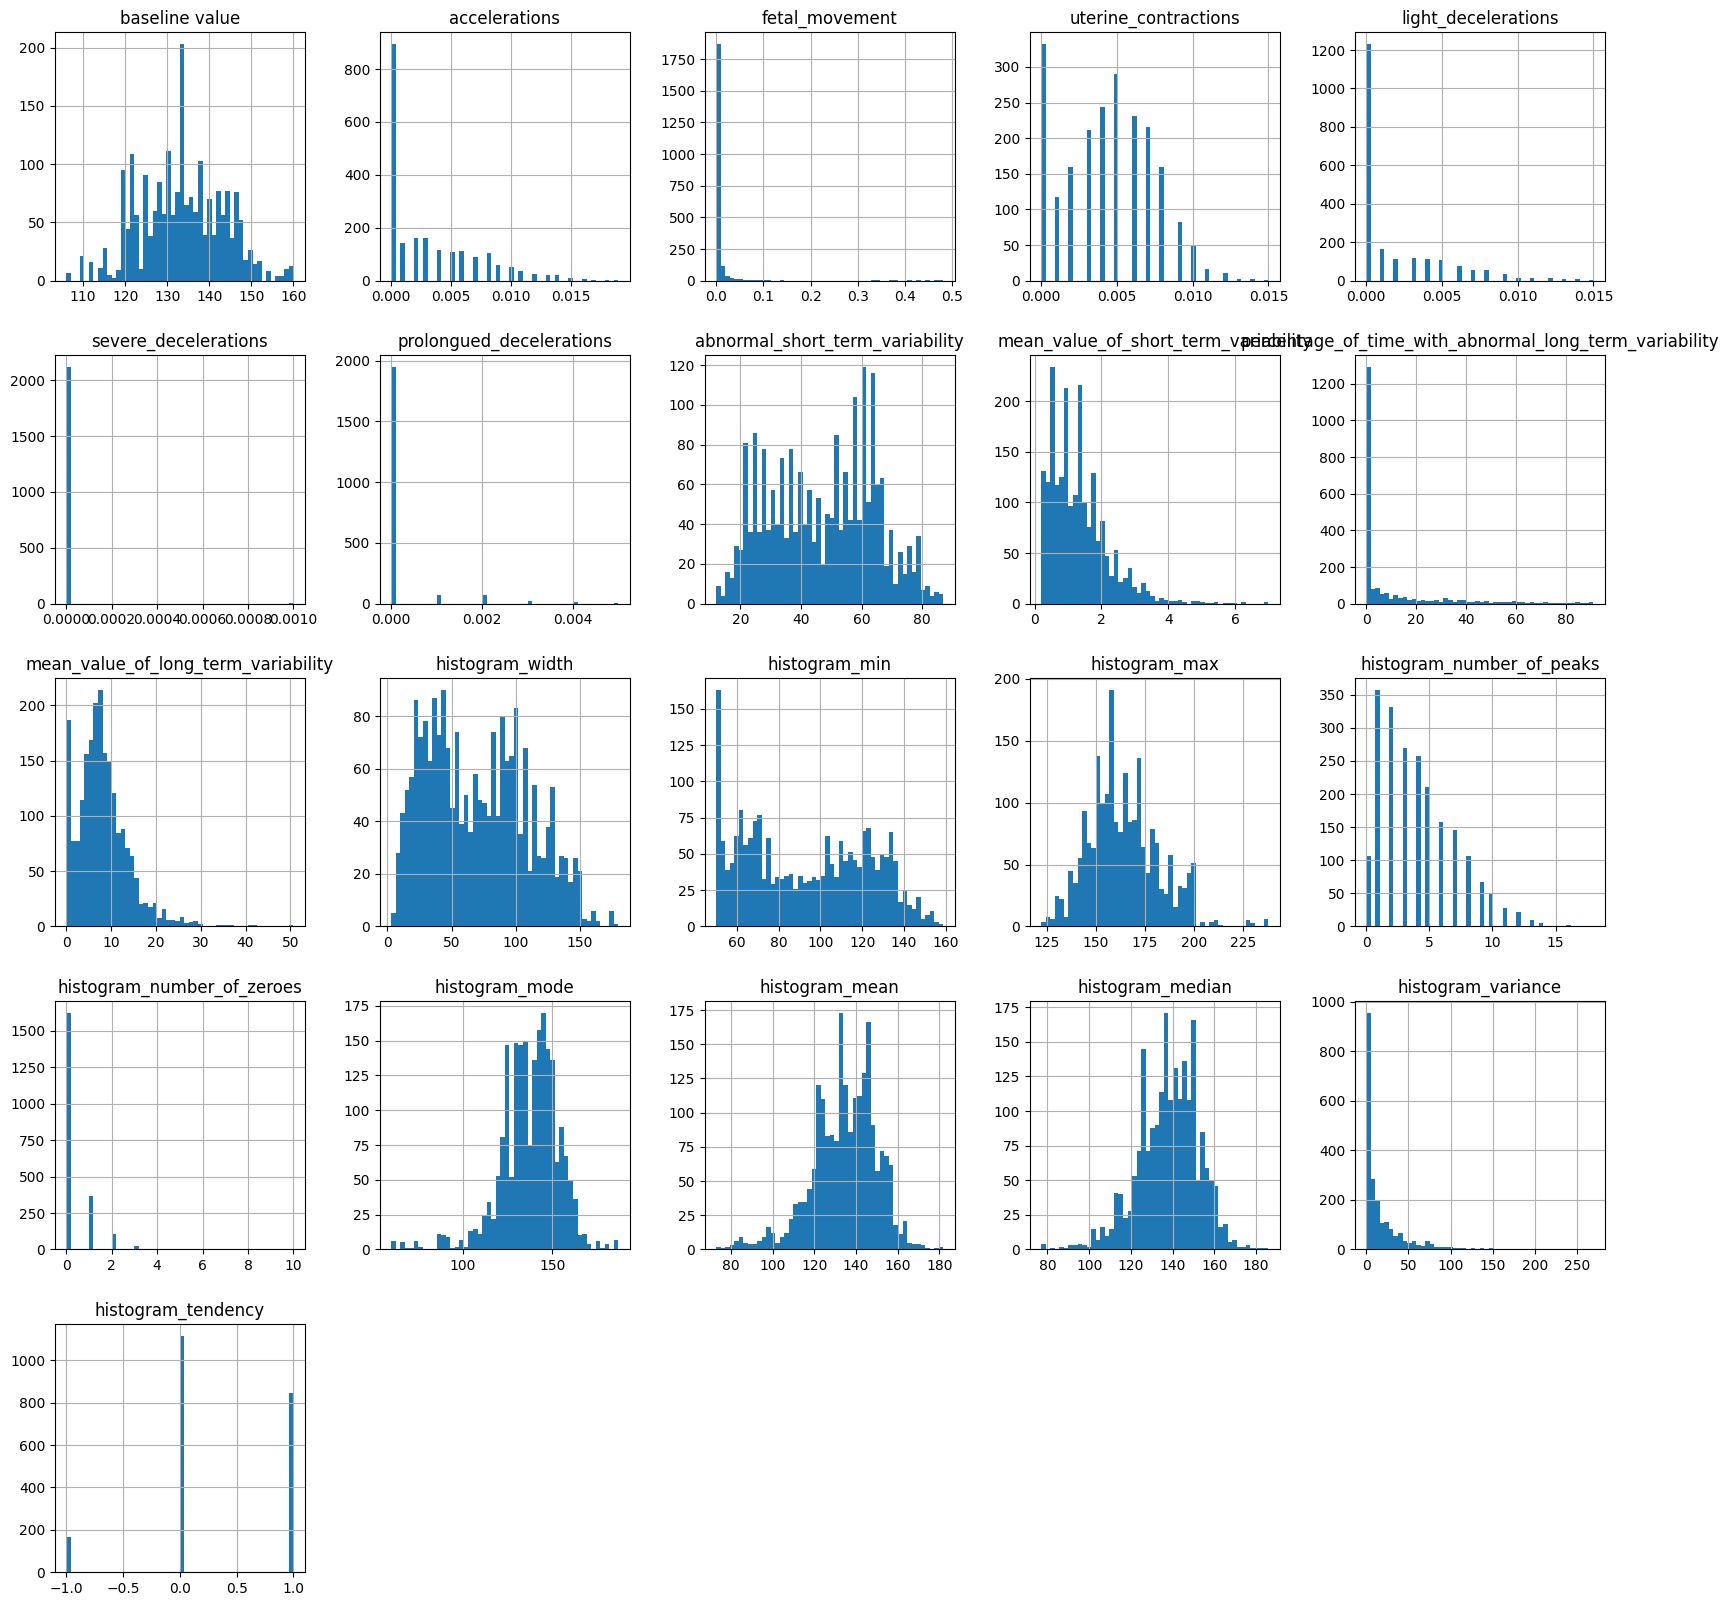

In [11]:
# Histogram of all features to analyze distribution
df.hist(bins=50, figsize=(20,20))
plt.title('Checking Data Distribution', fontsize=12)
plt.show()

## Correlation Matrix of all Predictor Features

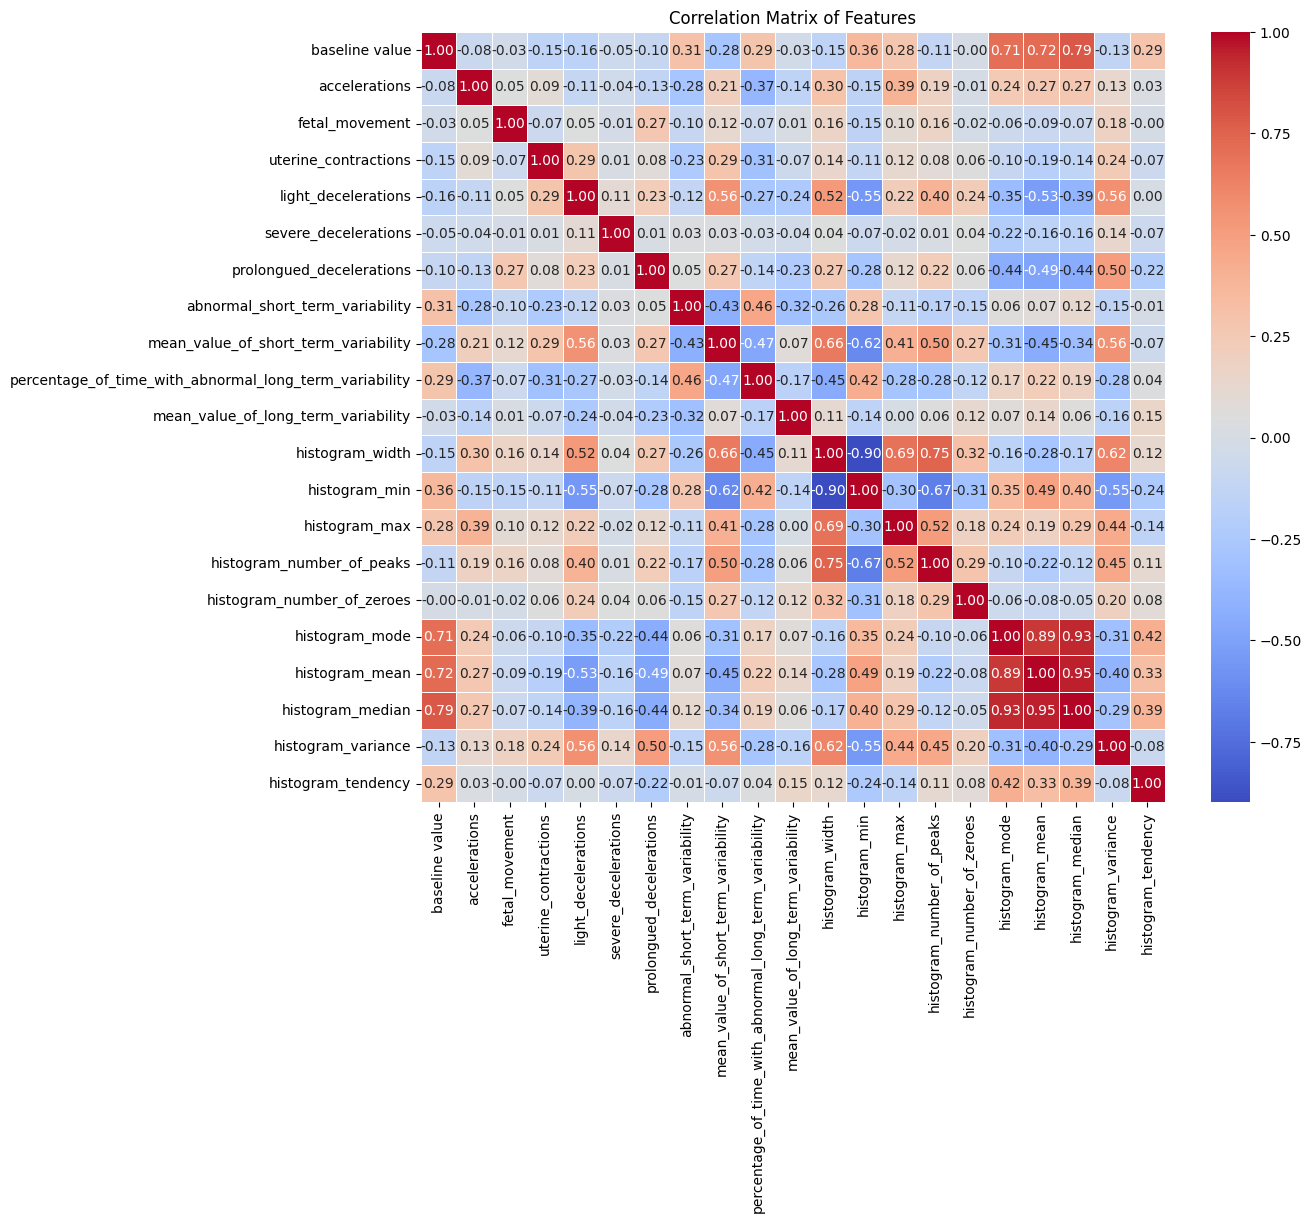

In [12]:
features = df.drop('fetal_health', axis=1)

# Calculate the correlation matrix
corr_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Insights

**Strong Positive Correlations:**

1. **histogram_median and histogram_mean (0.95):**

   *Possible Explanation:* 
   
- Consistency in Rate Patterns:

A consistent positive correlation may suggest that when the fetal heart rate is elevated around its midpoint (median), it tends to be accompanied by a higher overall average rate (mean). This consistency in rate patterns might be indicative of stable and predictable fetal heart activity during those periods.

- Clinical Considerations:

Medical professionals could use this information to understand the simultaneous variations in median and mean FHR, potentially highlighting periods of increased or decreased fetal stress or activity. It might prompt further investigation or monitoring during these phases for better assessment of fetal well-being.

2. **mean_of_short_term_variability and histogram_width (0.66):**

    *Possible Explanation:* 
    
- Dynamic Fetal Response:

Short-term variability is an essential indicator of the fetus's ability to respond dynamically to various stimuli.
A positive correlation with histogram width may suggest that during times of increased variability (wider histograms), the fetus tends to exhibit higher mean short-term variability.
This dynamic response may be associated with the fetus adapting to changing conditions, such as movement or external stimuli.

- Clinical Assessment:

Obstetricians often analyze FHR patterns to assess fetal well-being. A positive correlation might be considered when evaluating the overall health and adaptability of the fetal cardiovascular system.
It could be indicative of a fetus that responds well to environmental factors, leading to a broader range of FHR patterns and a higher average short-term variability.

- Consideration for Normal Variability:

The positive correlation may be viewed as a reflection of the normal physiological variation in fetal heart rate.
In clinical practice, understanding the relationship between short-term variability and histogram width helps healthcare providers distinguish normal variability from patterns that may indicate fetal distress.

**Strong Negative Correlations:**

1. **histogram_width and histogram_min (-0.898):**

    *Possible Explanation:*
    
- Range and Minimum Value Relationship:

The negative correlation suggests that as the width of the FHR histogram increases, the minimum value tends to decrease. In a medical context, this may indicate that broader ranges in the fetal heart rate distribution are associated with lower minimum values.

- Variability and Baseline Shifts:

A wider histogram width often reflects greater variability in the fetal heart rate. Concurrently, a lower minimum value suggests the occurrence of periods with lower baseline FHR. This relationship may be indicative of the fetal heart rate exhibiting more dynamic patterns with fluctuations and shifts.

- Clinical Implications:

Medical professionals may interpret this correlation as follows: when there is a broader range of FHR values, including both higher and lower rates, it coincides with periods where the baseline FHR tends to be lower. This variability in the fetal heart rate may signal adaptability and responsiveness to different conditions or stimuli.

2. **histogram_variance and histogram_min (-0.545):**

   - *Possible Explanation:* 

- Diversity of Fetal Heart Rate (FHR) Patterns:

Histogram variance typically measures the spread or variability of FHR values. A high variance suggests diverse FHR patterns over time.
Histogram min, on the other hand, represents the minimum FHR value observed. A low minimum could indicate periods of lower FHR.
The negative correlation suggests that when the variability (variance) of FHR patterns is high, the minimum FHR tends to be higher. This might mean that during periods of diverse FHR patterns, there are fewer instances of extremely low FHR.

- Clinical Implications:

In obstetrics, a certain level of FHR variability is considered normal and indicates a healthy, responsive fetal nervous system. Low variability may be associated with fetal distress.
If the histogram variance is high (indicating good variability) and, at the same time, the histogram min is not extremely low, it could suggest that the fetus is maintaining a generally healthy heart rate even during periods of variability.

- Monitoring and Intervention:

Obstetricians use FHR monitoring to assess fetal well-being. A negative correlation between histogram variance and histogram min might be considered when deciding the timing and necessity of interventions during labor.
Obstetric care providers might interpret this as an indication that even during periods of variability, the fetus is not experiencing prolonged or severe bradycardia (very low heart rate).

**Other Correlations:**

1. **baseline value and percentage_of_time_with_abnormal_long_term_variability (0.286):**
   - *Possible Explanation:* A moderate positive correlation between the baseline value and the percentage of time with abnormal long-term variability might suggest that certain baseline patterns are associated with a higher likelihood of abnormal long-term variability.

2. **light_decelerations and prolongued_decelerations (0.226):**
   - *Possible Explanation:* The positive correlation here implies that instances of light decelerations might coincide with prolonged decelerations. This could indicate a shared influence or common triggers in these fetal heart rate patterns.

**Recommendations:**

- **Further Investigation:** Explore the relationship between `histogram_median` and `histogram_mean` to understand the specific characteristics contributing to their strong positive correlation.

- **Clinical Validation:** Verify the findings related to fetal heart rate patterns (e.g., `light_decelerations` and `prolongued_decelerations`) through collaboration with medical experts to ensure the observed correlations align with known physiological associations.



## **Caution in Interpretation:**

While a correlation suggests a statistical relationship, it does not establish causation. Further research and clinical validation are necessary to confirm the medical significance of these relationship.
It's crucial to interpret such findings in consultation with healthcare professionals and domain experts who have a deep understanding of fetal monitoring and obstetrics.

In [13]:
# Selecting only the continuous features
continuous_features = df.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = continuous_features.corr()

# Displaying the correlation matrix
correlation_matrix

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481


### Kruskal-Wallis Test

In [14]:
# Create an empty DataFrame to store results
result_df = pd.DataFrame(index=features.columns, columns=['H-statistic', 'P-value', 'Significant'])

# Loop through each feature to perform the Kruskal-Wallis test
for column in features.columns:
    if features[column].dtype != 'object':
        h_statistic, p_value = kruskal(*[df[column][df['fetal_health'] == group] for group in df['fetal_health'].unique()])
        result_df.loc[column, 'H-statistic'] = h_statistic
        result_df.loc[column, 'P-value'] = p_value
        result_df.loc[column, 'Significant'] = 'Yes' if p_value < 0.05 else 'No'

# Display the results
result_df

,H-statistic,P-value,Significant
baseline value,254.333673,0.0,Yes
accelerations,449.738269,0.0,Yes
fetal_movement,27.792891,0.000001,Yes
uterine_contractions,174.651147,0.0,Yes
light_decelerations,114.353095,0.0,Yes
severe_decelerations,55.463493,0.0,Yes
prolongued_decelerations,537.669064,0.0,Yes
abnormal_short_term_variability,533.442304,0.0,Yes
mean_value_of_short_term_variability,383.308102,0.0,Yes
percentage_of_time_with_abnormal_long_term_variability,496.066124,0.0,Yes


### Insight
The Kruskal-Wallis tests were conducted to evaluate the relationship between various features and fetal health categories. This spcific test was picked after observing that the distributions of the various features varies between normal and skewed. The Kruskal-Wallis test does not assume a specific distribution.
The H-statistic measures the strength of association, and a lower p-value indicates stronger evidence of a significant relationship.

Statistically significant associations (p-value < 0.05) were observed for features like baseline value, accelerations, fetal movement, and others, suggesting their potential as predictive indicators for fetal health. However, histogram max and histogram number of zeroes showed weaker associations.

### Recommendation:
Considering the statistical significance of most features, it's advisable to prioritize those with clear associations (p-value < 0.05) for further exploration and potential inclusion in predictive models. Further investigation into features with marginal significance could be beneficial for a comprehensive understanding.

<a id="four"></a>

# Preprocessing

[Back to Table of Contents](#table-of-contents)

## Scaling and PCA Transformation

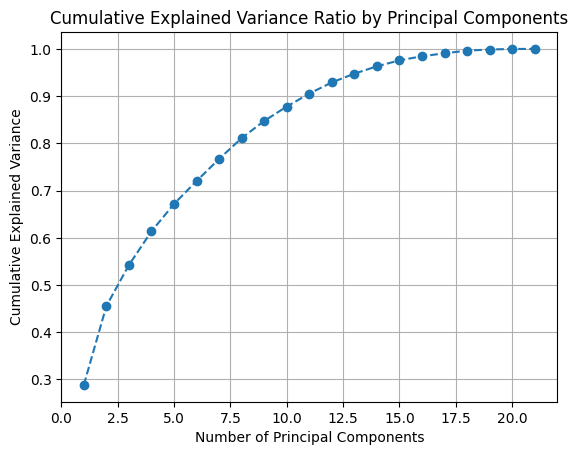

In [15]:
# Separate features and target variable
X = df.drop('fetal_health', axis=1)  
y = df['fetal_health']  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance ratio
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

In [16]:
# Set a threshold
threshold = 0.95

# Find the index where cumulative explained variance exceeds the threshold
optimal_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

print(f'Optimal number of components to retain {threshold * 100}% variance: {optimal_components}')


Optimal number of components to retain 95.0% variance: 14


In [17]:
X_pca = X_pca[:, :optimal_components]
X_pca.shape


(2126, 14)

### Reason:

The application of Principal Component Analysis (PCA) is aimed at assessing the impact of dimensionality reduction on the performance of the predictive models by comparing the outcomes derived from the transformed data with the original dataset. The primary objective is to investigate whether the reduced-dimensional representation obtained through PCA contributes to enhanced model performance in comparison to utilizing the complete feature set. This evaluation is crucial for understanding the trade-offs between dimensionality reduction and model accuracy, precision, recall, and other relevant performance metrics.

### Class Weights

In [18]:
# Class weights (For target variable imbalance)
total_samples = len(y)
class_weights = {'Normal': total_samples / 1655, 'Suspect': total_samples / 295, 'Pathological': total_samples / 176}


This is done to handle the class imbalance during model building.

<a id="five"></a>

# Model and Model Evaluation

[Back to Table of Contents](#table-of-contents)

### Here I want to compare the performance of the PCA-Transformed data versus the original scaled data so an 80-20 train test split has been used on both datasets that will then be used for model training.

In [19]:
# the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# the original scaled data
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Building

To achieve robust and high-performance results, a comparative analysis will be conducted between an Ensemble-Based Learning algorithm and an Instance-Based Leaning algorithm.

### An Ensemble learning algorithm was chosen mainly because of its:
1. Improved accuracy and generalizability
2. Ability to handle complex feature interactions
3. Reduced risk of overfitting
4. Robustness to noise and outliers
5. Ability to handle class imbalances

### An Instance based learning algorithm was chosen mainly because of its:
1. Tendency to not assume data distribution
2. Effectiveness with Small Datasets
3. Applicability to Anomaly Detection
4. Adaptability to Changes

The Random Forest Classifier (Ensemble) and K-Next Neighbours (KNN) Classifier (Instance Based) will be evaluated and compared using both the PCA-transformed and Original datasets

## Random Forest Classifier

### Model Training

In [20]:
# PCA-Transformed data

# Initialize model
rf_classifier = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train model on PCA data
rf_pca = rf_classifier.fit(X_train_pca, y_train)

# Make predictions on PCA test set
rf_predictions_pca = rf_pca.predict(X_test_pca)

In [21]:
# Original Data

# Initialize model
rf_classifier = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train model on Original Data
rf_og = rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on Original test set
rf_predictions_og = rf_og.predict(X_test_scaled)

### Evaluation

In [22]:
# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}\n{"-"*40}\n')


# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{title} - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Original Data

Model: RandomForestClassifier
Accuracy: 0.9484
Precision: 0.9472
Recall: 0.9484
F1 Score: 0.9471
Confusion Matrix:
[[327   0   6]
 [  2  27   0]
 [ 13   1  50]]
----------------------------------------



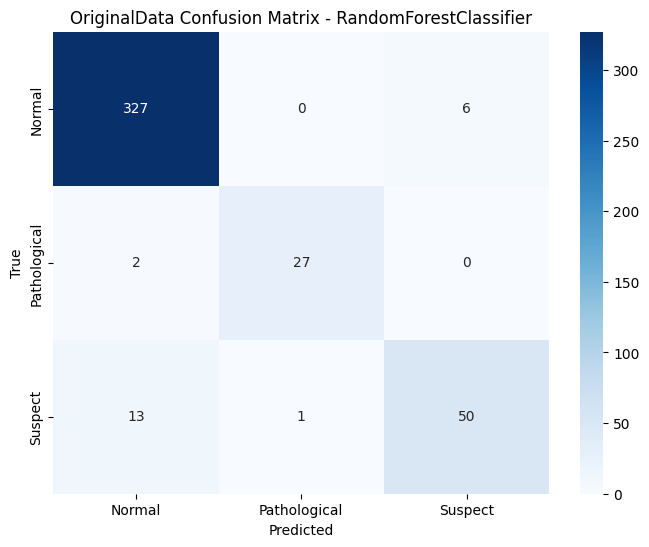

In [23]:
# Evaluate model on the original data
evaluate_model(rf_og, X_test_scaled, y_test)
plot_confusion_matrix (rf_og, X_test_scaled, y_test, title='Original Data Confusion Matrix')

### PCA Data

Model: RandomForestClassifier
Accuracy: 0.9178
Precision: 0.9155
Recall: 0.9178
F1 Score: 0.9128
Confusion Matrix:
[[327   1   5]
 [  4  24   1]
 [ 23   1  40]]
----------------------------------------



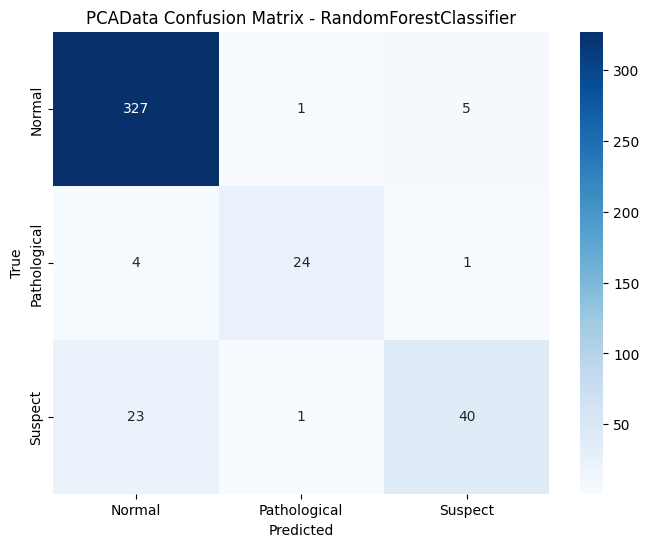

In [24]:
# Evaluate model on the PCA-transformed data
evaluate_model(rf_pca, X_test_pca, y_test)
plot_confusion_matrix (rf_pca, X_test_pca, y_test, title='PCA Data Confusion Matrix')

### Performance Metric Insights

The original data model outperformed the PCA-transformed data model across all metrics (accuracy, precision, recall, and F1 score). The higher values in accuracy, precision, recall, and F1 score for the original data model indicate that it provided a better overall performance in predicting fetal health compared to the model using PCA-transformed data.

This suggests that the information captured by the original features was more beneficial for the RandomForestClassifier in this context compared to the reduced-dimensional representation obtained through PCA.

### Confusion Matrix Insights


1. **Original Data Model:**
   - Higher correct predictions in all classes.
   - Slightly better in predicting "Suspect" and "Pathological" cases.
   - Fewer misclassifications overall.

2. **PCA-transformed Data Model:**
   - Slightly lower correct predictions, especially in "Normal" and "Pathological" cases.
   - Slightly higher misclassifications in some instances.

**Conclusion:**
The RandomForestClassifier trained on the original data performed better. It demonstrated higher accuracy in predicting all classes, with fewer misclassifications. The information captured by the original features seems to be more effective for this model compared to the reduced-dimensional representation obtained through PCA.

Therefore, the RandomForestClassifier with the original data is the preferred model in this comparison.

## K-Nearest Neighbours Classifier

### Model Training

In [25]:
# PCA-Transformed Data

# Initialize model 
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train model on PCA Data
knn_pca = knn_classifier.fit(X_train_pca, y_train)

# Make predictions on PCA Test
knn_predictions_pca = knn_pca.predict(X_test_pca)



In [26]:
# Original Data

# Initialize model 
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train model on Original Data
knn_og = knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on Original Test
knn_predictions_og = knn_og.predict(X_test_scaled)


### Evaluation

### Original Data

Model: KNeighborsClassifier
Accuracy: 0.9155
Precision: 0.9121
Recall: 0.9155
F1 Score: 0.9128
Confusion Matrix:
[[324   2   7]
 [  4  22   3]
 [ 16   4  44]]
----------------------------------------



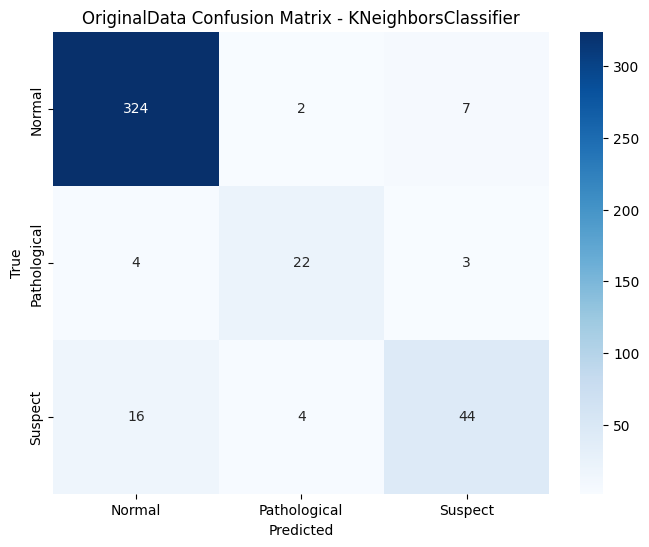

In [27]:
# Evaluate model on the original data
evaluate_model(knn_og, X_test_scaled, y_test)
plot_confusion_matrix(knn_og, X_test_scaled, y_test, title='Original Data Confusion Matrix')

### PCA Data

Model: KNeighborsClassifier
Accuracy: 0.9014
Precision: 0.8965
Recall: 0.9014
F1 Score: 0.8976
Confusion Matrix:
[[322   2   9]
 [  4  22   3]
 [ 20   4  40]]
----------------------------------------



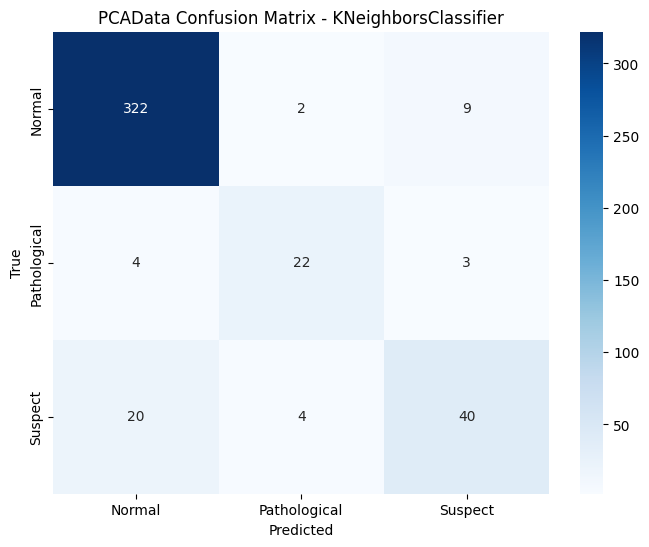

In [28]:
# Evaluate model on the PCA-Transformed data
evaluate_model(knn_pca, X_test_pca, y_test)
plot_confusion_matrix(knn_pca, X_test_pca, y_test, title='PCA Data Confusion Matrix')

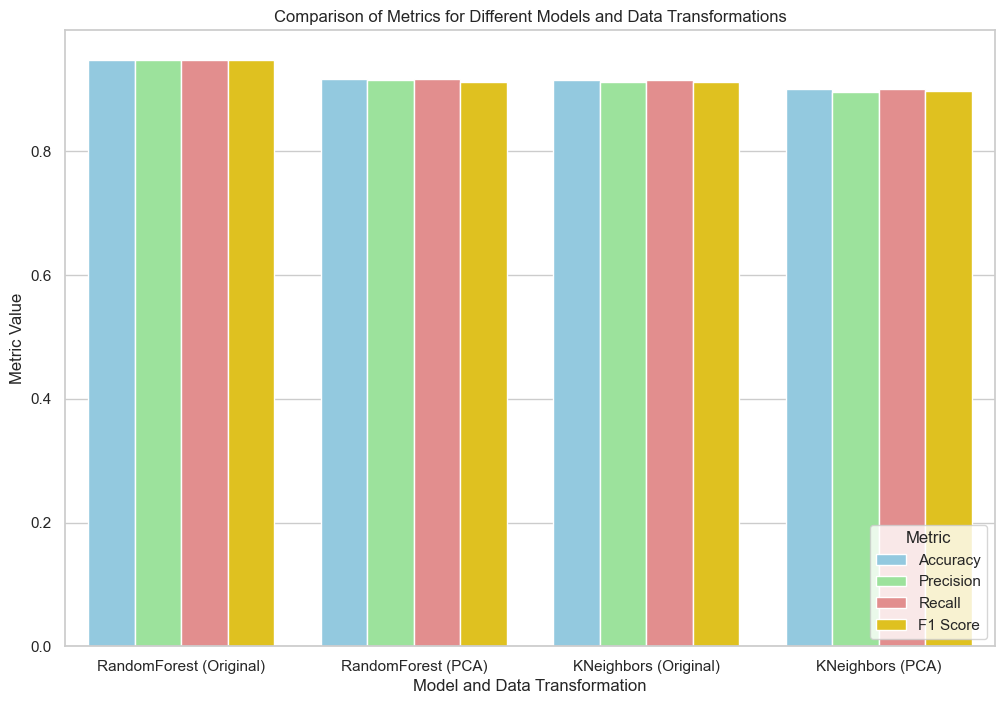

In [12]:
# Define the data
models = ['RandomForest (Original)', 'RandomForest (PCA)', 'KNeighbors (Original)', 'KNeighbors (PCA)']
accuracy = [0.9484, 0.9178, 0.9155, 0.9014]
precision = [0.9472, 0.9155, 0.9121, 0.8965]
recall = [0.9484, 0.9178, 0.9155, 0.9014]
f1_score = [0.9471, 0.9128, 0.9128, 0.8976]

# Create a DataFrame for easy plotting
data = {'Model': models * 4,
        'Metric': ['Accuracy'] * 4 + ['Precision'] * 4 + ['Recall'] * 4 + ['F1 Score'] * 4,
        'Value': accuracy + precision + recall + f1_score}

df_metrics = pd.DataFrame(data)

# Define a custom color palette
custom_palette = {'Accuracy': 'skyblue', 'Precision': 'lightgreen', 'Recall': 'lightcoral', 'F1 Score': 'gold'}

# Plotting
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x='Model', y='Value', hue='Metric', data=df_metrics, palette=custom_palette)
plt.title('Comparison of Metrics for Different Models and Data Transformations')
plt.xlabel('Model and Data Transformation')
plt.ylabel('Metric Value')
plt.legend(title='Metric', loc='lower right')
plt.show()

## Performance Metric Insights

The original data model outperformed the PCA-transformed data model across all metrics (accuracy, precision, recall, and F1 score). The higher values in accuracy, precision, recall, and F1 score for the original data model indicate that it provided a better overall performance in predicting fetal health compared to the model using PCA-transformed data.

This suggests that the information captured by the original features was more beneficial for the GradientBoostingClassifier in this context compared to the reduced-dimensional representation obtained through PCA.

## Confusion Matrix Insights

In both confusion matrices, the diagonal elements represent the true positive predictions for each class. The off-diagonal elements represent misclassifications. Here's a concise analysis:

- Both models have similar true positive counts across the three classes, indicating a comparable ability to correctly predict instances of each class.
- The misclassification patterns are also quite similar between the two models.

Considering the similarity in performance metrics between the two models, it would be appropriate to consider the performance metrics above (accuracy, precision, recall, and F1 score) to make a more comprehensive comparison. 

In conclusion, based on the confusion matrices alone, it's challenging to definitively say that one model significantly outperforms the other.

## Comparision Between the Random Forest Classifier and K-Neighbours Classifier (Original Data)

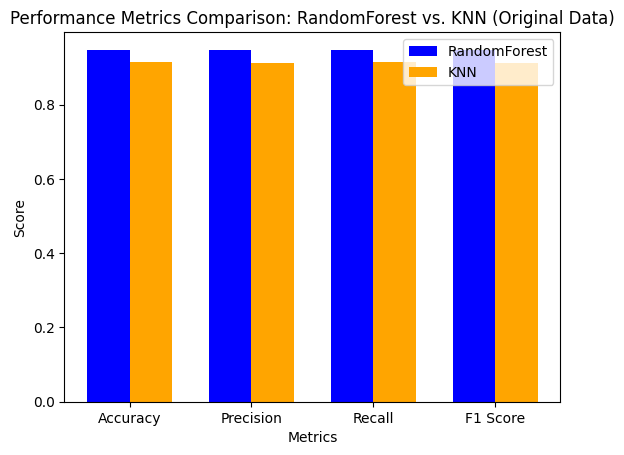

In [28]:
y_true_rf = y_test  # actual values for RandomForestClassifier
y_pred_rf = rf_predictions_og  # predicted values for RandomForestClassifier

y_true_knn = y_test  # actual values for KNNClassifier
y_pred_knn = knn_predictions_og  # predicted values for KNNClassifier

# Calculate performance metrics for RandomForestClassifier
accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
precision_rf = precision_score(y_true_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_true_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_true_rf, y_pred_rf, average='weighted')

# Calculate performance metrics for KNNClassifier
accuracy_knn = accuracy_score(y_true_knn, y_pred_knn)
precision_knn = precision_score(y_true_knn, y_pred_knn, average='weighted')
recall_knn = recall_score(y_true_knn, y_pred_knn, average='weighted')
f1_knn = f1_score(y_true_knn, y_pred_knn, average='weighted')

# Create a bar plot for performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_metrics_values = [accuracy_rf, precision_rf, recall_rf, f1_rf]
knn_metrics_values = [accuracy_knn, precision_knn, recall_knn, f1_knn]

bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, rf_metrics_values, width=bar_width, label='RandomForest', color='blue')
plt.bar(index + bar_width, knn_metrics_values, width=bar_width, label='KNN', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison: RandomForest vs. KNN (Original Data)')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.show()

### Insights

Based on the above metrics, the RandomForestClassifier appears to have performed better than the KNeighborsClassifier for the original dataset. These are the reasons why:

1. Higher Accuracy: RandomForestClassifier achieved an accuracy of 0.9484, compared to KNeighborsClassifier's 0.9155. This indicates that RandomForestClassifier correctly classified a higher proportion of data points.

2. Similar Precision and Recall: Both models have very similar precision (around 0.94) and recall (around 0.91). This means they are both good at correctly identifying true positives and true negatives.

3. Slightly Higher F1 Score: F1 score combines precision and recall into a single metric. While both models have similar individual values, RandomForestClassifier's slightly higher F1 score (0.9471 compared to 0.9128) suggests it found a better balance between precision and recall.

Overall, considering both accuracy and F1 score, RandomForestClassifier seems to be the better performing model for this dataset.

## Hyperparameter Tuning for Random Forest Classifier

In [30]:
# GridSearch Parameters
parameters = {
    'n_estimators': [5, 50, 100, 150, 200],
    'max_depth': list(range(1, 11)),
    'criterion':['gini','entropy'],
    'max_features': list(range(20)),
    'oob_score':[False,True],
}

# GridSearch 
rf_og_gs = GridSearchCV(rf_classifier, parameters, cv=5, verbose=1, n_jobs=-1)

rf_og_gs.fit(X_train_scaled, y_train)
y_preds_rf_cv = rf_og_gs.predict((X_test_scaled))

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
762 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.

In [47]:
# Function that Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))  
    
print_results(rf_og_gs)
    

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 200, 'oob_score': False}



In [48]:
#tuned RandomForestClassifier
rf_tuned = RandomForestClassifier(criterion='entropy',
                             n_estimators= 150, 
                             max_depth=10, 
                             max_features=10,
                             oob_score=True
                            )

# Fitting and predicting
rf_tuned.fit(X_train_scaled, y_train)
y_preds_rf_cv = rf_tuned.predict(X_test_scaled)



In [49]:
evaluate_model(rf_tuned, X_test_scaled, y_test)


Model: RandomForestClassifier
Accuracy: 0.9624
Precision: 0.9620
Recall: 0.9624
F1 Score: 0.9620
Confusion Matrix:
[[327   1   5]
 [  1  28   0]
 [  8   1  55]]
----------------------------------------



## Insights

The RandomForestClassifier (With Hyperparameter Tuning) outperformed the original RandomForestClassifier across all metrics (accuracy, precision, recall, and F1 score). The higher values in accuracy, precision, recall, and F1 score for the model with hyperparameter tuning indicate that it provided a better overall performance in predicting fetal health compared to the original RandomForestClassifier.

The hyperparameter-tuned model achieved improvements in key metrics, such as precision, recall, and F1 score, suggesting that the tuning process optimized the model's parameters for better predictive performance on the given data. It resulted in a more accurate and balanced classification of the different fetal health classes.


In the confusion matrices:

- Both models have high diagonal values, indicating good performance in predicting true positives for each class.
- The hyperparameter-tuned model has fewer false positives and false negatives in comparison to the original model, which is reflected in the improved precision, recall, and F1 score.

The overall trend in the confusion matrices aligns with the improvements seen in the evaluation metrics, reinforcing the conclusion that the RandomForestClassifier with hyperparameter tuning performed better.

## Important Features

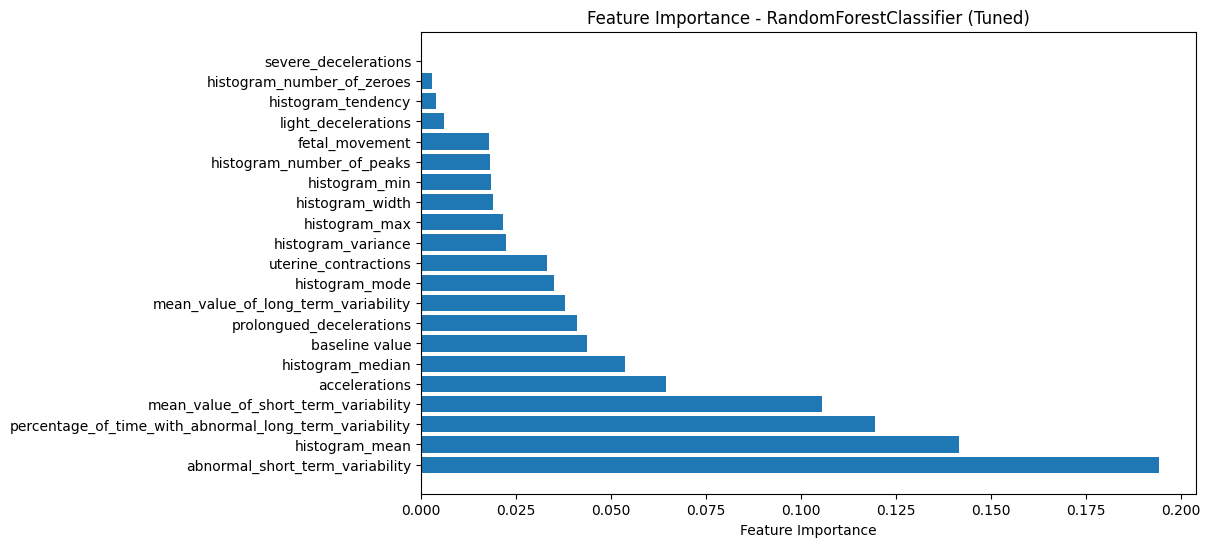

In [52]:
# Get feature importances
importances = rf_tuned.feature_importances_

# Convert NumPy array to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Get feature names
feature_names = X_train_scaled_df.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances[indices], align="center")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - RandomForestClassifier (Tuned)")
plt.show()

### Insights

The feature importance analysis indicates that certain features play a more critical role in determining the target variable (fetal health) based on the analysis algorithm used. In this case, the top 5 features, ranked in descending order of importance, are:

1. Abnormal Short-Term Variability:

This feature holds the highest importance in determining fetal health. Abnormal short-term variability in fetal heart rate is a significant indicator, and its prominence suggests that deviations from the expected short-term pattern strongly influence the classification of fetal health.

2. Histogram Mean:

The histogram mean of fetal heart rate, which represents the central tendency of the distribution, is the second most important feature. This suggests that the average value of the FHR, as captured by the histogram mean, is crucial in assessing fetal health.

3. Percentage of Time with Abnormal Long-Term Variability:

The proportion of time during which the fetus exhibits abnormal long-term variability is the third most important feature. Long-term variability is another key aspect of FHR patterns, and a higher percentage of abnormal long-term variability appears to be indicative of fetal health issues.

4. Mean of Short-Term Variability:

The average value of short-term variability, which measures beat-to-beat fluctuations, is the fourth most important feature. This reinforces the significance of short-term variability in assessing fetal well-being.

5. Accelerations:

The presence and characteristics of accelerations in fetal heart rate patterns are the fifth most important features. Accelerations are generally associated with normal fetal well-being, and their inclusion in the top features highlights their relevance in the classification of fetal health.

### Actual Vs Predicted Values

In [54]:
# Convert NumPy array to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display a sample of the dataset with actual and predicted values
sample_df = pd.concat([X_test_scaled_df, pd.Series(y_test.reset_index(drop=True), name='Actual'), pd.Series(y_preds_rf_cv, name='Predicted')], axis=1)

# Display a sample of the dataset with actual and predicted values
print("Sample of the dataset with actual and predicted values:")
sample_df.sample(100) # Displaying a random sample of 100 rows


Sample of the dataset with actual and predicted values:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,Actual,Predicted
271,0.375680,0.730133,-0.160342,0.215111,0.037349,-0.057476,-0.268754,0.582350,0.076119,-0.535361,-0.246605,0.989924,-0.831702,0.778965,-0.362263,0.958201,0.644055,0.538134,0.754307,0.835044,1.112980,Normal,Normal
87,2.306863,-0.822388,-0.203210,2.591718,2.064711,-0.057476,-0.268754,-0.232135,3.133760,-0.535361,2.490237,2.042649,-1.474609,2.005277,0.994270,0.958201,0.827234,0.473990,0.961731,1.836051,1.112980,Normal,Normal
227,-1.148938,0.212626,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,-0.930266,-0.037127,-0.535361,0.108829,-0.473621,0.048066,-0.949021,-0.701397,0.958201,-1.065614,-0.744746,-0.974219,-0.476621,-0.524526,Normal,Normal
403,-0.945655,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,3.379267,-0.744213,-1.500670,0.826322,-1.896626,-1.040530,-0.458444,-0.821375,-0.680602,-0.905078,-0.649208,-0.524526,Pathological,Pathological
205,0.070757,3.576422,-0.160342,-0.124404,-0.638438,-0.057476,-0.268754,0.058752,0.982087,-0.535361,-1.455081,1.272362,-1.474609,0.333033,0.316003,-0.458444,1.376771,0.987141,1.169154,0.317282,1.112980,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.172398,-0.304881,-0.203210,-0.463919,-0.638438,-0.057476,-0.268754,0.989593,-0.829849,-0.535361,0.357633,-0.756060,0.860159,-0.224382,-0.362263,-0.458444,0.582996,0.409846,0.339461,-0.407586,-0.524526,Normal,Normal
110,0.782245,-0.822388,-0.160342,-1.482465,-0.638438,-0.057476,-0.268754,1.164125,-1.056341,1.856911,0.179916,0.193961,-0.797864,-0.893279,-0.701397,-0.458444,0.338757,0.409846,0.339461,-0.614691,1.112980,Suspect,Suspect
369,-0.539090,0.212626,-0.203210,-0.803434,1.726817,-0.057476,-0.268754,-1.570218,1.435070,-0.535361,0.890784,0.553428,-0.493329,0.388775,-0.701397,0.958201,0.827234,0.153270,0.270320,0.696974,1.112980,Normal,Normal
150,-0.030884,-0.822388,-0.160342,0.894142,0.713136,-0.057476,-0.268754,0.756882,0.982087,-0.535361,-1.259592,-0.139830,-0.357981,-0.893279,-1.040530,-0.458444,-0.149720,-0.680602,-0.421091,0.006624,1.112980,Normal,Normal


In [ ]:
# Export the DataFrame to an Excel sheet
sample_df.to_excel("actual_vs_predicted_results.xlsx", index=False)

<a id="six"></a>

# Conclusion and Recommendations

[Back to Table of Contents](#table-of-contents)

**Summary:**

This investigation into fetal health prediction using Cardiotocography (CTG) data yields crucial insights through a multi-faceted analysis. The initial Exploratory Data Analysis (EDA) uncovers notable correlations, providing a foundational understanding of feature interdependencies. The subsequent application of the Kruskal-Wallis test elucidates the varying degrees of influence each feature exerts on the target variable, contributing to a nuanced comprehension of feature significance.

In pursuit of dimensionality reduction, Principal Component Analysis (PCA) is employed, seeking to assess its impact on model performance. The results, however, consistently favor the original data in subsequent model training and evaluation. This suggests that the rich information embedded in the original features plays a pivotal role in accurately predicting fetal health.

The comparative study between the RandomForestClassifier and the K-NeighboursClassifier underscores the former's superiority in all evaluated metrics. The RandomForestClassifier not only outperforms its counterpart but also showcases consistent performance across both the original and PCA-transformed datasets. 

Feature importance analysis identifies key contributors to fetal health prediction. Notably, abnormal_short_term_variability, histogram_mean, and percentage_of_time_with_abnormal_long_term_variability emerge as influential features. These findings underscore the significance of specific aspects of CTG data in determining fetal health outcomes.

**Recommendations:**

1. **Collaboration with Domain Experts:** Engage in collaborative efforts with domain experts to decipher the clinical implications of influential features. This collaboration will enrich the interpretability of the models and enhance their applicability in real-world obstetric scenarios.

2. **Continuous Monitoring:** Implement continuous monitoring of model performance to ensure its sustained accuracy over time. Regular updates and recalibrations can accommodate shifts in data patterns and evolving clinical scenarios.

3. **Exploration of Additional Data Sources:** Explore the incorporation of additional relevant data sources to further enhance predictive accuracy. Integrating complementary datasets may provide a more comprehensive understanding of factors influencing fetal health.

**Conclusion Statement:**

In conclusion, this study advocates for the continued exploration and refinement of predictive models for fetal health based on CTG data. The findings endorse the RandomForestClassifier as a robust choice for accurate predictions, while feature importance analysis points towards specific CTG parameters as critical determinants of fetal health. These insights, coupled with collaborative efforts and continuous improvement, hold the potential to advance the field of obstetric prediction and contribute to improved prenatal care.